<a href="https://colab.research.google.com/github/nathasha-naranpanawa/COMP4702_2024/blob/main/PracW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1


**(a)**

Text(0, 0.5, 'f(x) = 2sin(1.5x)')

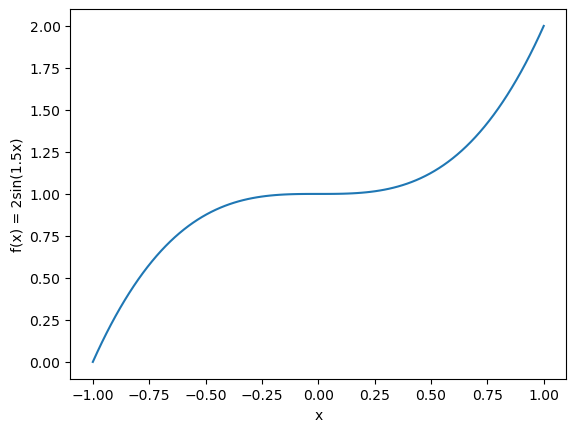

In [3]:
# Define the function
def f(x):
    return x**3+1

# Generate x values in the specified domain
x = np.linspace(-1, 1, 100)

# Calculate corresponding y values using the function
y = f(x)

# Plot the true function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x) = x**3+1')

**(b)**

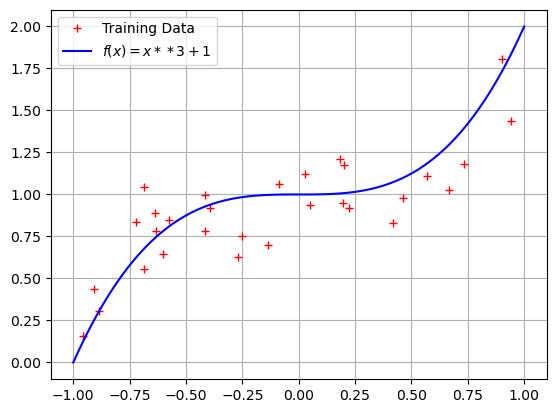

In [4]:
# Create the sample training set
np.random.seed(42)  # for reproducibility

# Generate 30 random x values in the specified domain
train_x = np.random.uniform(-1, 1, 30) # specify the parameters correctly

# Genearte noise with same size as that of the data.
noise = np.random.normal(0, 0.2, 30) # specify the parameters correctly

# Evaluate the true function at each input value and add Gaussian random noise
train_y = f(train_x) + noise

# Plot the noisy data points (sample training data)
plt.plot(train_x, train_y, '+', color='red', label='Training Data')

# Plot the true function
plt.plot(x, y, label=r'$f(x) = x**3+1 $', color='blue')

# Add labels and legend
plt.legend()
plt.grid(True)
plt.show()

**(c)**

In [9]:
# Perform linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Reshape the data for sklearn (if needed)
linear_model = LinearRegression()
# Perform linear regression
linear_model.fit(train_x.reshape(-1, 1), train_y)
# Predict y values on training data using the linear model
y_pred_linear = linear_model.predict(train_x.reshape(-1, 1))
# Calculate the sum of squares error
linear_error = np.sum((train_y - y_pred_linear)**2)
print(f'Linear Regression Training Set Error: {linear_error:.2f}')

Linear Regression Training Set Error: 1.19


**(d)**

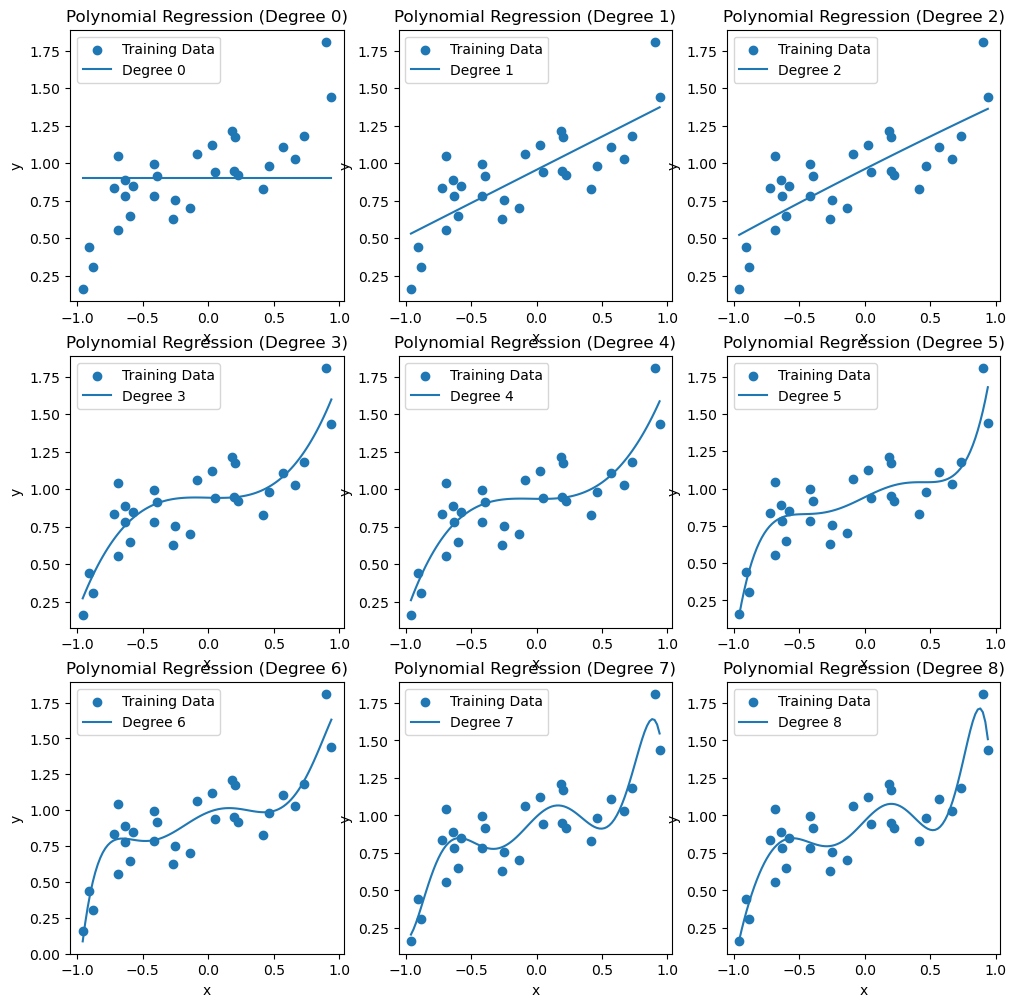

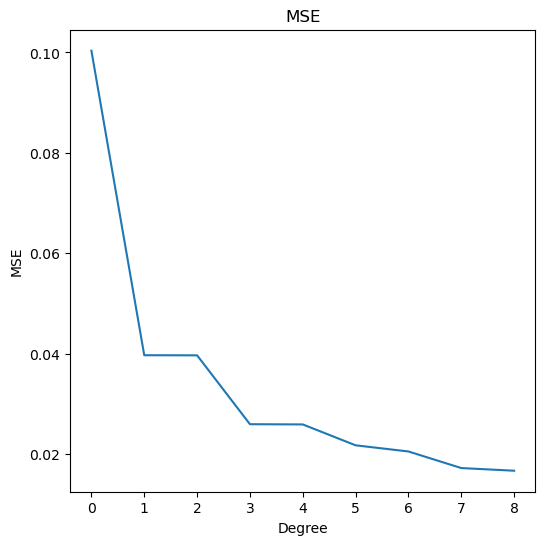

In [10]:
# Perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures

mses = [] # Store MSE for each degree for visualization (optional)

plt.figure(figsize=(12,12))

# Experiment with different polynomial orders
for degree in range(9):
    plt.subplot(3,3,degree+1)

  # Polynomial regression
    poly_features = PolynomialFeatures(degree=degree)
    train_x_poly = poly_features.fit_transform(train_x.reshape(-1, 1))
    poly_model = LinearRegression()
    poly_model.fit(train_x_poly, train_y)
  # Predict y values using the polynomial model
    y_pred_poly = poly_model.predict(train_x_poly)

  # Calculate the sum of squares error
    mse = mean_squared_error(train_y, y_pred_poly)
    mses.append(mse)

  # Plot the polynomial function for current degree
    x_plot = np.linspace(np.min(train_x), np.max(train_x), 100)
    x_plot_poly = poly_features.transform(x_plot.reshape(-1, 1))
    y_plot_poly = poly_model.predict(x_plot_poly)
    plt.scatter(train_x, train_y, label='Training Data')
    plt.plot(x_plot, y_plot_poly, label=f'Degree {degree}')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
# Plot MSE
plt.figure(figsize=(6,6))
plt.plot(np.arange(0, 9, 1), mses)
plt.title('MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()

# Q2

**(b)**

In [20]:
# Load the dataset
pokemon_data = pd.read_csv("pokemonregr.csv")

# Handle missing data - impute/drop/etc. (justify your choices)

# Define X, y
X = pokemon_data[['attack', 'defense', 'height_m', 'sp_attack', 'sp_defense', 'speed']]  # Features
y = pokemon_data['weight_kg']  # Target variable
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()
linear_model = LinearRegression()
linear_model.fit(X_imputed, y_imputed)
# Define linear regression model

LinearRegression()

**(c)**

In [21]:
# Print the coefficients of the trained Linear Model
coefficients = linear_model.coef_
print("Coefficients:", coefficients)
# (hint: look at the documentation of LinearRegression() method in sklearn)

Coefficients: [ 3.57073776e-01  5.51563573e-01  5.38438804e+01  1.52883140e-02
  1.58541752e-01 -3.94064114e-01]


## (d)

In [22]:
feature_names = X.columns
feature_importance = dict(zip(feature_names, coefficients))
print("Feature Importance:")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance:.2f}")

Feature Importance:
attack: 0.36
defense: 0.55
height_m: 53.84
sp_attack: 0.02
sp_defense: 0.16
speed: -0.39


**(e)**

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_imputed)
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()
# Define X, y for normalized features
X_norm = X_normalized
y_norm = y_imputed
# Define linear regression model
linear_model_normalized = LinearRegression()
linear_model_normalized.fit(X_norm, y_norm)
# What are the coefficients of the new model
coefficients_normalized = linear_model_normalized.coef_
print("\nCoefficients (Normalized Features):", coefficients_normalized)


Coefficients (Normalized Features): [ 64.27327971 124.10180386 775.35187789   2.81304978  33.29376791
 -68.96121987]


# Q3

**(a)**

In [25]:
# Library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [26]:
# load dataset
df = pd.read_csv('w3classif.csv', header=None)

# Define X, y
X, y = df[df.columns[:-1]], df[df.columns[-1]]

In [27]:
# Standardize the features (optional but often recommended for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create and fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_scaled, y)
# Print the model parameters (coefficients and intercept)
print("Model Coefficients:", logreg_model.coef_)
print("\nModel Intercept:",logreg_model.intercept_)

Model Coefficients: [[2.90611866 3.0174738 ]]

Model Intercept: [0.60011651]


**(b)**

In [29]:
# Standardize the test data point using the same scaler (if using Standardization above)
test_point = [[1.1, 1.1]]
test_point_scaled = scaler.transform(test_point)
# Predict the probability of class 1 for the test data point
probability_y1 = logreg_model.predict_proba(test_point_scaled)[0][1]
print("Probability p(y' = 1 | x'):", probability_y1)

Probability p(y' = 1 | x'): 0.3275431867215719


**(c)**

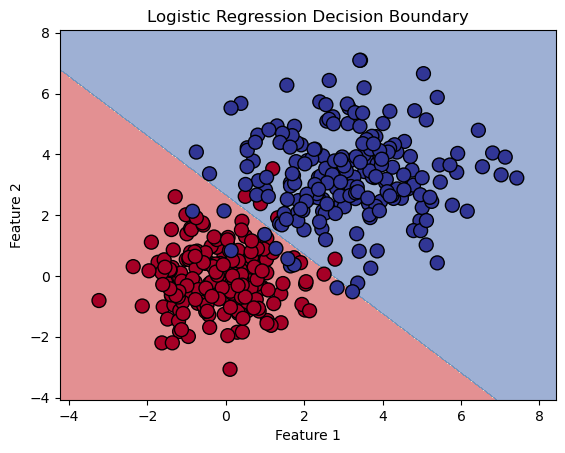

In [41]:
# Generate a meshgrid of points for plotting the decision boundary
X_array = X.to_numpy()
x_min, x_max = X_array[:, 0].min() - 1, X_array[:, 0].max() + 1
y_min, y_max = X_array[:, 1].min() - 1, X_array[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Standardize the meshgrid points using the same scaler
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_points_scaled = scaler.transform(meshgrid_points)

# Predict the class labels for the meshgrid points
predictions = logreg_model.predict(meshgrid_points_scaled)

# Reshape the predictions to match the shape of the meshgrid
predictions = predictions.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, predictions, cmap='RdYlBu', alpha=0.5)
plt.scatter(X_array[:, 0], X_array[:, 1], c=y, cmap='RdYlBu', edgecolors='k', marker='o', s=100)

# Plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')

# Show the plot
plt.show()

pandas.core.frame.DataFrame